In [ ]:
%%capture
!pip install bertopic

In [ ]:
import numpy as np
import pandas as py
import matplotlib.pyplot as plt
import re
import string
import math
import pandas as pd

# Importing dataset
df=pd.read_csv('/content/tweets_covid19 (12).csv') 
print("Shape of data=>",df.shape)

Shape of data=> (2943, 5)


In [ ]:
pip install emoji

     |████████████████████████████████| 170 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=16afe646ee3f33da25d7914fa220bc68bc1af3389c948d27ac25c33c014fc8da
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
import pandas as pd

import re
import emoji 
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)# removing entire twitter handle
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)#removing entire hashtags
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
df['Clean_Tweet'] = df['text'].map(lambda x: cleaner(x))
df['Clean_Tweet'] = df['Clean_Tweet'].str.replace('\d+', '')
df.to_csv("clean.csv")
df

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


,Unnamed: 0,text,date,user,location,Clean_Tweet
0,0,@wesstreeting it was very disappointing to hea...,2021-12-07 08:04:28,IndependtParty,NaN,it was very disappointing to hear use the This...
1,1,RT @DrAMehndiratta: Common question being aske...,2021-12-06 07:31:36,rajnishgupta59,India,: Common question being - saying that is not c...
2,2,RT @DrAMehndiratta: Common question being aske...,2021-12-06 05:36:36,HairaanJivi,Land of AnekChidiyan 🙏,: Common question being - saying that is not c...
3,3,Common question being asked- #southafrica sayi...,2021-12-06 05:29:36,DrAMehndiratta,"Goa, India",Common question being - saying that is not cau...
4,4,@htTweets @narendramodi is waiting for disaste...,2021-12-04 02:28:04,gsk1234567,India,"is waiting for disaster to happen in case of ,..."
...,...,...,...,...,...,...
2938,2914,"RT @SanaaAlimia: UK media covering #Omricon, #...",2021-11-29 08:39:50,AnandDairtan,"Mongolia, Ulaanbaatar",": media covering , & ; travel to of black peop..."
2939,2915,I'm more concerned about whether this #Omricon...,2021-11-29 08:34:34,K_Thorp,"Norwich, England",I ' m more concerned about whether this varian...
2940,2916,RT @liarpoliticians: They can't find 6 illegal...,2021-11-29 08:26:33,ShieldmaidenNS,NaN,": They can ' t find illegal , but to find six..."
2941,2917,RT @liarpoliticians: They can't find 6 illegal...,2021-11-29 08:26:23,defranklondon,Regents Park London England,": They can ' t find illegal , but to find six..."


In [ ]:
df=df[['Clean_Tweet']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (2943, 1)


,Clean_Tweet
0,it was very disappointing to hear use the This...
1,: Common question being - saying that is not c...
2,: Common question being - saying that is not c...
3,Common question being - saying that is not cau...
4,"is waiting for disaster to happen in case of ,..."


In [ ]:
df.isnull().sum()

Clean_Tweet    0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Clean_Tweet    0
dtype: int64

In [ ]:
df['cleaned']=df['Clean_Tweet'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned'] = df['cleaned'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Clean_Tweet,cleaned
0,it was very disappointing to hear use the This...,it was very disappointing to hear use the this...
1,: Common question being - saying that is not c...,common question being saying that is not caus...
2,: Common question being - saying that is not c...,common question being saying that is not caus...
3,Common question being - saying that is not cau...,common question being saying that is not causi...
4,"is waiting for disaster to happen in case of ,...",is waiting for disaster to happen in case of l...
...,...,...
2938,": media covering , & ; travel to of black peop...",media covering travel to of black people thre...
2939,I ' m more concerned about whether this varian...,i m more concerned about whether this variant ...
2940,": They can ' t find illegal , but to find six...",they can t find illegal but to find six peopl...
2941,": They can ' t find illegal , but to find six...",they can t find illegal but to find six peopl...


In [ ]:
for index,cleaned in enumerate(df['cleaned'][35:40]):
  print('Tweet %d:\n'%(index+1),cleaned)

Tweet 1:
  the new scary variant as by this man who in 
Tweet 2:
  boom yet again were top of the eu for the new strain god we are so good at getting it wrong 
Tweet 3:
  important people listen
Tweet 4:
 one thing i haven t seen in the outbreak is the number of people are still dying of delta tho 
Tweet 5:
 i hear this a lot that we have to live with covid this may be the case but it t mean we forget where 


In [ ]:
for index,cleaned in enumerate(df['cleaned'][35:40]):
  print('Tweet %d:\n'%(index+1),cleaned)

Tweet 1:
  the new scary variant as by this man who in 
Tweet 2:
  boom yet again were top of the eu for the new strain god we are so good at getting it wrong 
Tweet 3:
  important people listen
Tweet 4:
 one thing i haven t seen in the outbreak is the number of people are still dying of delta tho 
Tweet 5:
 i hear this a lot that we have to live with covid this may be the case but it t mean we forget where 


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['cleaned'] = df['cleaned'].str.replace('[^\w\s]', '')
df['cleaned'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    it wa veri disappoint to hear use the thi migh...
1    common question be say that is not caus n onli...
2    common question be say that is not caus n onli...
3    common question be say that is not caus n onli...
4    is wait for disast to happen in case of like l...
Name: cleaned, dtype: object

In [ ]:
df['tweet_len'] = df['cleaned'].astype(str).apply(len)
df['word_count'] = df['cleaned'].apply(lambda x: len(str(x).split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['thi','new','get','like','give', 'go','make','one','whi','hi','use','need','wa','plea','see','got','look','hey','ani','say','tri','still','come']
stopwords.extend(newStopWords)
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df['cleaned'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0         veri disappoint hear might b
1     common question caus n onli mild
2     common question caus n onli mild
3     common question caus n onli mild
4    wait disast happen case last time
Name: cleaned, dtype: object

In [ ]:
from textblob import TextBlob, Word
df['polarity'] = df['cleaned'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Clean_Tweet,cleaned,tweet_len,word_count,polarity
0,it was very disappointing to hear use the This...,veri disappoint hear might b,54,12,0.000000
1,: Common question being - saying that is not c...,common question caus n onli mild,51,11,0.016667
2,: Common question being - saying that is not c...,common question caus n onli mild,51,11,0.016667
3,Common question being - saying that is not cau...,common question caus n onli mild,51,11,0.016667
4,"is waiting for disaster to happen in case of ,...",wait disast happen case last time,54,12,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1b0ac28d0>,
      dtype=object)

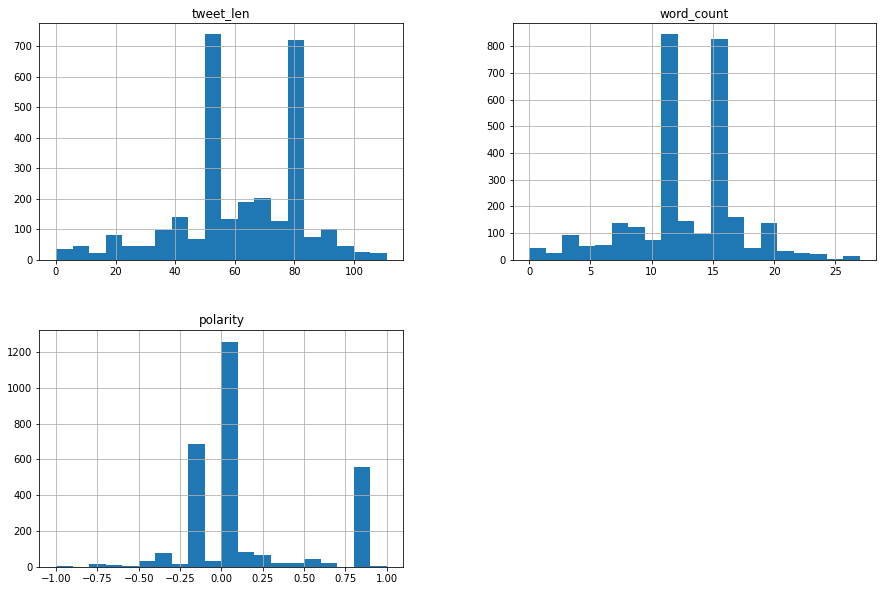

In [ ]:
df[["tweet_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

In [ ]:
cleantext = " ".join(cleaned for cleaned in df.cleaned)

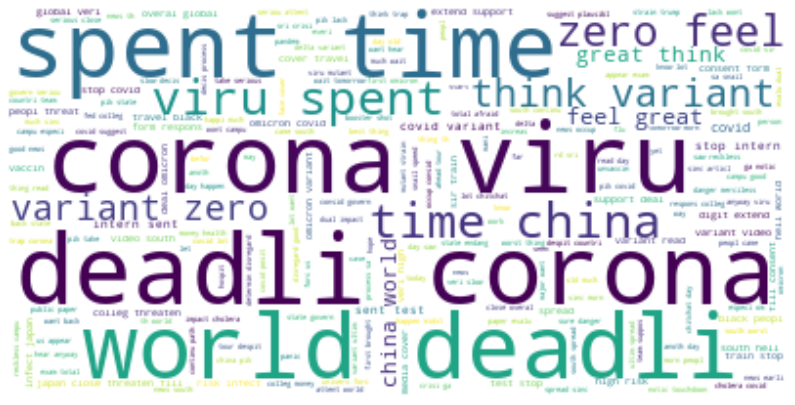

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(cleantext)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['cleaned'], 20)
df1 = pd.DataFrame(common_words, columns = ['cleaned', 'count'])
df1

,cleaned,count
0,variant,822
1,viru,691
2,world,688
3,time,639
4,corona,626
5,deadli,605
6,china,599
7,spent,593
8,think,576
9,feel,560


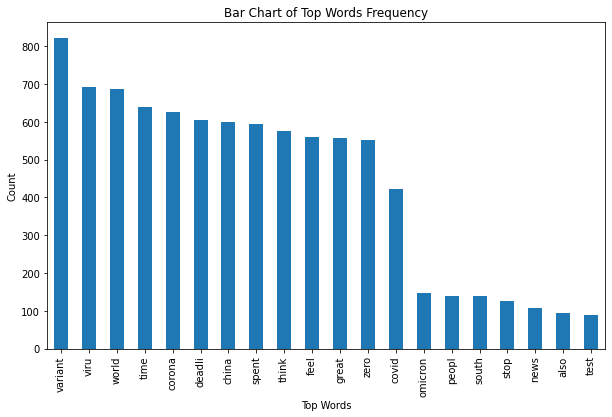

In [ ]:
df1.groupby('cleaned').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['cleaned'], 30)
df2 = pd.DataFrame(common_words2, columns=['cleaned', "Count"])
df2.head()

,cleaned,Count
0,corona viru,598
1,deadli corona,593
2,spent time,593
3,world deadli,591
4,viru spent,591


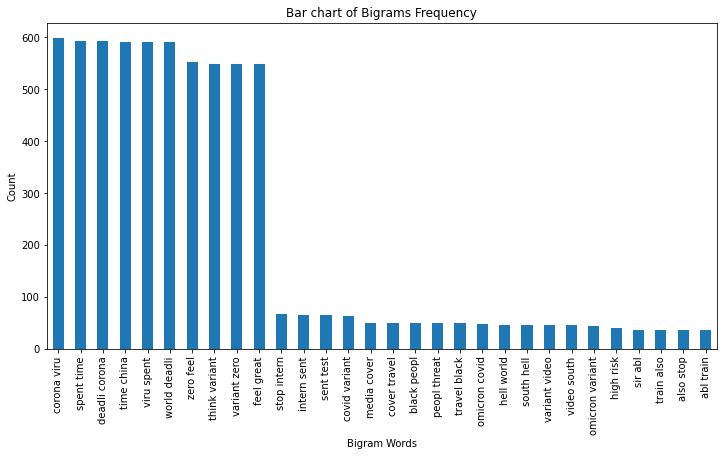

In [ ]:
df2.groupby('cleaned').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

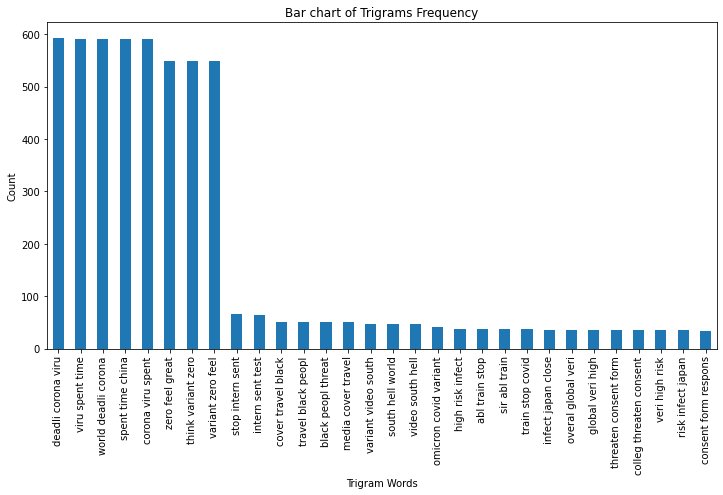

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['cleaned'], 30)
df3 = pd.DataFrame(common_words3, columns = ['cleaned' , 'Count'])
df3.groupby('cleaned').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

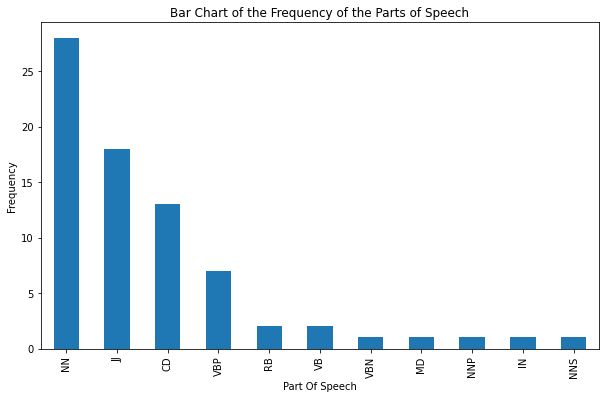

In [ ]:
blob = TextBlob(str(df['cleaned']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_grouped=df[['cleaned','lemmatized']].groupby(by='cleaned').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
cleaned,
,
aa aa way ye corona ka spread,aa aa way ye corona ka spread
aa hoon main main hoon main hoon block,aa hoon main main hoon main hoon block
accord intern monetari fund global econom growth,accord intern monetari fund global econom growth
accord world health organ omicron variant high risk infect,accord world health organ omicron variant high...


In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,abl,abnorm,abov,absenc,absolut,accept,accord,account,accur,acquir,act,action,activ,actual,ad,add,addit,address,admit,advic,affect,affluent,afford,afraid,agarw,age,ago,ahead,air,airdrop,airport,aka,al,alarm,alert,alien,allegedli,alon,alpha,...,weird,welcom,well,west,wet,whatev,whenev,whip,wi,wife,will,win,winter,wish,wonder,wor,word,work,workplac,world,worri,worst,worth,would,wow,wrap,write,wro,wrong,xi,ya,ye,year,yellow,yesterday,yo,york,young,zero,zimbabw
cleaned,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aa aa way ye corona ka spread,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
aa hoon main main hoon main hoon block,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['cleaned']):
  print('Review {}:\n'.format(index+1),review)

Review 1:
 top model better top best variant
Review 2:
 think simpli time lag argument wane best bring whip terrifi e
Review 3:
 think variant zero feel great


In [ ]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['cleaned']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 assum signific commun spread base spread everywher
Review 2:
 sorri moron twitter made trend topic copi omicron th letter al
Review 3:
 base scientif evid seriou prejudic well west


In [ ]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df

,Clean_Tweet,cleaned,tweet_len,word_count,polarity,lemmatized
0,it was very disappointing to hear use the This...,veri disappoint hear might b,54,4,0.000000,veri disappoint hear b
1,: Common question being - saying that is not c...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild
2,: Common question being - saying that is not c...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild
3,Common question being - saying that is not cau...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild
4,"is waiting for disaster to happen in case of ,...",wait disast happen case last time,54,5,0.000000,wait disast happen case time
...,...,...,...,...,...,...
2938,": media covering , & ; travel to of black peop...",media cover travel black peopl threat,51,6,-0.166667,media cover travel black peopl threat
2939,I ' m more concerned about whether this varian...,concern whether variant bad side peopl hospit,67,5,-0.700000,concern variant bad peopl hospit
2940,": They can ' t find illegal , but to find six...",find illeg find six peopl,62,4,0.000000,find illeg find peopl
2941,": They can ' t find illegal , but to find six...",find illeg find six peopl,62,4,0.000000,find illeg find peopl


In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(cleaned):
    return TextBlob(cleaned).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(cleaned):
        return TextBlob(cleaned).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_data = pd.DataFrame(df[['cleaned', 'lemmatized']])

In [ ]:
df['Subjectivity'] = df['lemmatized'].apply(getSubjectivity) 
df['Polarity'] = df['lemmatized'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

,Clean_Tweet,cleaned,tweet_len,word_count,polarity,lemmatized,Subjectivity,Polarity,Analysis
0,it was very disappointing to hear use the This...,veri disappoint hear might b,54,4,0.000000,veri disappoint hear b,0.0,0.000000,Neutral
1,: Common question being - saying that is not c...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild,0.5,0.016667,Positive
2,: Common question being - saying that is not c...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild,0.5,0.016667,Positive
3,Common question being - saying that is not cau...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild,0.5,0.016667,Positive
4,"is waiting for disaster to happen in case of ,...",wait disast happen case last time,54,5,0.000000,wait disast happen case time,0.0,0.000000,Neutral


In [ ]:
tb_counts = df.Analysis.value_counts()

tb_counts

Neutral     1853
Positive     845
Negative     245
Name: Analysis, dtype: int64

In [ ]:
conditions = [
    (df['Analysis'] == 'Neutral'),
    (df['Analysis'] == 'Positive'),
    (df['Analysis'] == 'Negative')
    ]

# create a list of the values we want to assign for each condition
values = [0, 1,-1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment'] = np.select(conditions, values)

# display updated DataFrame
df

,Clean_Tweet,cleaned,tweet_len,word_count,polarity,lemmatized,Subjectivity,Polarity,Analysis,sentiment
0,it was very disappointing to hear use the This...,veri disappoint hear might b,54,4,0.000000,veri disappoint hear b,0.000000,0.000000,Neutral,0
1,: Common question being - saying that is not c...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild,0.500000,0.016667,Positive,1
2,: Common question being - saying that is not c...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild,0.500000,0.016667,Positive,1
3,Common question being - saying that is not cau...,common question caus n onli mild,51,6,0.016667,common question caus n onli mild,0.500000,0.016667,Positive,1
4,"is waiting for disaster to happen in case of ,...",wait disast happen case last time,54,5,0.000000,wait disast happen case time,0.000000,0.000000,Neutral,0
...,...,...,...,...,...,...,...,...,...,...
2938,": media covering , & ; travel to of black peop...",media cover travel black peopl threat,51,6,-0.166667,media cover travel black peopl threat,0.433333,-0.166667,Negative,-1
2939,I ' m more concerned about whether this varian...,concern whether variant bad side peopl hospit,67,5,-0.700000,concern variant bad peopl hospit,0.666667,-0.700000,Negative,-1
2940,": They can ' t find illegal , but to find six...",find illeg find six peopl,62,4,0.000000,find illeg find peopl,0.000000,0.000000,Neutral,0
2941,": They can ' t find illegal , but to find six...",find illeg find six peopl,62,4,0.000000,find illeg find peopl,0.000000,0.000000,Neutral,0


In [ ]:
from sklearn.model_selection import train_test_split
tweets = df['cleaned'].values
labels = df['sentiment'].values
tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=1000)

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
punctuations = string.punctuation
parser = English()
stopwords = list(STOP_WORDS)
def spacy_tokenizer(utterance):
      tokens = parser(utterance)
      return [token.lemma_.lower().strip() for token in tokens if token.text.lower().strip() not in stopwords and token.text not in punctuations]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
#By default, the vectorizer might be created as follows:
#vectorizer = CountVectorizer()
vectorizer.fit(tweets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fc1a3f4c8c0>)

In [ ]:
X_train = vectorizer.transform(tweets_train)
X_test = vectorizer.transform(tweets_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracy = classifier.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9405772495755518


In [ ]:
new_reviews = ['Old version of python useless', 'Very good effort, but not five stars', 'Clear and concise']
X_new = vectorizer.transform(new_reviews)
classifier.predict(X_new)

array([0, 1, 0])

In [ ]:
from bertopic import BERTopic



In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
model = BERTopic(verbose=True)
#convert to list 
docs = df.cleaned.to_list()
topics, probabilities = model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/92 [00:00<?, ?it/s]

2021-12-08 05:37:45,779 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-12-08 05:38:23,092 - BERTopic - Reduced dimensionality with UMAP
2021-12-08 05:38:23,256 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
freq = model.get_topic_info(); 
freq.head(5)

,Topic,Count,Name
0,0,594,0_expect_content_accur_never
1,1,354,1_sciatica_nerv_howev_ars
2,-1,282,-1_sampl_episod_virologist_case
3,2,198,2_fine___
4,3,70,3_intern_test_requir_airport


In [ ]:
model.get_topic(3)  # Select the most frequent topic

[('intern', 0.27575729462705595),
 ('test', 0.24751073248463448),
 ('requir', 0.033667474754156115),
 ('airport', 0.030851744836738308),
 ('arriv', 0.028853952666934274),
 ('area', 0.023222492832098655),
 ('clear', 0.021224700662294625),
 ('reaction', 0.01924049842068898),
 ('hold', 0.0180335039304999),
 ('pleas', 0.0077966204137295035)]

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_hierarchy(top_n_topics=50)

In [ ]:
model.visualize_barchart(top_n_topics=5)

In [ ]:
model.visualize_heatmap(n_clusters=20, width=700, height=700)

In [70]:
model.visualize_term_rank()

In [71]:
model.update_topics(docs, topics, n_gram_range=(1, 2))

In [72]:
model.get_topic(0)   # We select topic that we viewed before

[('viru china', 0.0013326839494744562),
 ('china back', 0.0013326839494744562),
 ('china deadli', 0.0013326839494744562),
 ('accur even', 0.0007497230863166754),
 ('never expect', 0.0007497230863166754),
 ('expect accur', 0.0007497230863166754),
 ('expect', 0.0007497230863166754),
 ('even content', 0.0007497230863166754),
 ('content china', 0.0007497230863166754),
 ('content', 0.0007497230863166754)]

In [73]:
similar_topics, similarity = model.find_topics("vehicle", top_n=5); similar_topics

[60, 14, 12, 41, 6]

In [74]:
model.get_topic(71)

False

In [75]:
model.save("my_model")

In [76]:
my_model = BERTopic.load("my_model")

In [77]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cpu")
model = BERTopic(embedding_model=sentence_model, verbose=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [79]:
tweets = df['cleaned'].values
labels = df['sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.33, random_state=42)

In [80]:
from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
clf.fit(x_train, y_train)

print(classification_report(y_test, clf.predict(x_test), digits=4))

              precision    recall  f1-score   support

          -1     0.9394    0.7750    0.8493        80
           0     0.9278    0.9689    0.9479       610
           1     0.9405    0.8972    0.9183       282

    accuracy                         0.9321       972
   macro avg     0.9359    0.8803    0.9052       972
weighted avg     0.9324    0.9321    0.9312       972



In [81]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [82]:
df = df.loc[:, ['cleaned', 'sentiment']]

In [83]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
X_train = train['cleaned'].values
X_test = test['cleaned'].values
y_train = train['sentiment']
y_test = test['sentiment']

In [84]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
X_train = train['cleaned'].values
X_test = test['cleaned'].values
y_train = train['sentiment']
y_test = test['sentiment']

In [85]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words("english")) 

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = en_stopwords)

In [86]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [87]:
np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.9626485568760611

In [88]:
grid_svm.best_params_

{'svc__C': 1}

In [89]:
grid_svm.best_score_

0.9587974883678907

In [90]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred,average='micro')
    prec = precision_score(y, pred,average='micro')
    rec = recall_score(y, pred,average='micro')
    result = {'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [91]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'acc': 0.9626485568760611,
 'f1': 0.9626485568760611,
 'precision': 0.9626485568760611,
 'recall': 0.9626485568760611}